In [1]:
import pandas as pd
import numpy as np

In [2]:
credits_csv = 'credits.csv'
movies_csv = 'movies.csv'

df_credits = pd.read_csv(credits_csv)
df_movies = pd.read_csv(movies_csv)
# question 1:
# how = inner indicates only the intersection part of two dataframes will be kept
df_total = pd.merge(df_movies, df_credits, how='inner', on=['id'])


In [3]:
# df_movies  1000 x 24
# df_credits  1499 x 3
# df_total 767 x 26
# print(df_total)

In [4]:
my_columns = ['id', 'title', 'popularity', 'cast', 'crew',
                  'budget', 'genres', 'original_language', 'production_companies',
                  'production_countries', 'release_date', 'revenue', 'runtime',
                  'spoken_languages', 'vote_average', 'vote_count']
total_columns = list(df_total.columns)
drop_columns = [ column  for column in total_columns if column not in my_columns]

In [5]:
drop_columns

['adult',
 'belongs_to_collection',
 'homepage',
 'imdb_id',
 'original_title',
 'overview',
 'poster_path',
 'status',
 'tagline',
 'video']

In [6]:
df_total.drop(drop_columns, axis=1, inplace=True)

In [7]:
df_total = df_total.set_index('id')

In [8]:
df3 = df_total
df3

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew
id,,,,,,,,,,,,,,,
2,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",fi,3.860491,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",21/10/1988,0,69,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Ariel,7.1,44,"[{'cast_id': 3, 'character': 'Taisto Olavi Kas...","[{'credit_id': '52fe420dc3a36847f800001f', 'de..."
3,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",fi,2.292110,"[{'name': 'Villealfa Filmproduction Oy', 'id':...","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",16/10/1986,0,76,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Shadows in Paradise,7.1,35,"[{'cast_id': 5, 'character': 'Nikander', 'cred...","[{'credit_id': '52fe420dc3a36847f8000077', 'de..."
5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de..."
6,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",en,5.538671,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",15/10/1993,12136938,110,"[{'iso_639_1': 'en', 'name': 'English'}]",Judgment Night,6.4,79,"[{'cast_id': 7, 'character': 'Frank Wyatt', 'c...","[{'credit_id': '52fe420dc3a36847f800023d', 'de..."
11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,42.149697,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,0.227122,"[{'name': 'Isle of Man Film Commission', 'id':...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",12/09/2003,0,91,"[{'iso_639_1': 'en', 'name': 'English'}]",The Boys from County Clare,6.5,3,"[{'cast_id': 6, 'character': 'Jimmy', 'credit_...","[{'credit_id': '560f3cc09251414779004a53', 'de..."
1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,2.331416,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de..."
1591,0,"[{'id': 18, 'name': 'Drama'}]",de,3.020270,"[{'name': 'MTM Cineteve', 'id': 740}, {'name':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",11/12/2001,0,140,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Nowhere in Africa,7.0,32,"[{'cast_id': 17, 'character': 'Jettel Redlich'...","[{'credit_id': '52fe4302c3a36847f803389b', 'de..."


In [9]:
df3.drop(df3[df3.budget==0].index, inplace=True)

In [10]:
df4 = df3

In [11]:
df4['success_impact'] = df4.apply(lambda x: (x.revenue - x.budget)/x.budget, axis=1)
df5 = df4

In [12]:
df5

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,9.026586,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",0.075000
11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,42.149697,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",69.490728
12,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,25.497794,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",9.003570
13,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,48.307194,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",11.326280
14,15000000,"[{'id': 18, 'name': 'Drama'}]",en,20.726578,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,10.391900,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",-0.087930
1588,28000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.402888,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",2.230355
1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,2.331416,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",-1.000000


In [13]:
min_p = df5['popularity'].min()
type(min_p)
max_p = float(df4['popularity'].max())
df5['popularity'] = df5.apply(lambda x : 100*(x.popularity-min_p)/(max_p-min_p),axis=1)

In [14]:
df5

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,5.978631,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",0.075000
11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,29.585317,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",69.490728
12,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,17.717584,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",9.003570
13,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,33.973737,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",11.326280
14,15000000,"[{'id': 18, 'name': 'Drama'}]",en,14.317160,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,6.951684,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",-0.087930
1588,28000000,"[{'id': 35, 'name': 'Comedy'}]",en,4.108733,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",2.230355
1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,1.207014,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",-1.000000


In [15]:
df5['popularity'].max()

100.0

In [16]:
df6 = df5

In [17]:
df6['popularity'] = df6['popularity'].astype('int16')

In [18]:
df6

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,5,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539,"[{'cast_id': 42, 'character': 'Ted the Bellhop...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",0.075000
11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,29,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778,"[{'cast_id': 3, 'character': 'Luke Skywalker',...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",69.490728
12,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,17,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292,"[{'cast_id': 8, 'character': 'Marlin (voice)',...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",9.003570
13,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,33,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147,"[{'cast_id': 7, 'character': 'Forrest Gump', '...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",11.326280
14,15000000,"[{'id': 18, 'name': 'Drama'}]",en,14,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438,"[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,6,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943,"[{'cast_id': 13, 'character': 'Gilbert Grape',...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",-0.087930
1588,28000000,"[{'id': 35, 'name': 'Comedy'}]",en,4,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574,"[{'cast_id': 1, 'character': 'Torrance Shipman...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",2.230355
1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,1,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44,"[{'cast_id': 4, 'character': 'Ludwig van Beeth...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",-1.000000


In [19]:
type(df4['popularity'].max())

numpy.int16

In [20]:
df7 = df6

In [21]:
import ast
import json

In [22]:
# df7['cast'] = df7['cast'].apply(lambda x: ast.literal_eval(x))
L = list( i[0] for i in df7['cast'])

In [23]:
df6['cast'].shape

(542,)

In [24]:
L = list(df6['cast'])

In [25]:
r1 = ast.literal_eval(L[0])
r1

[{'cast_id': 42,
  'character': 'Ted the Bellhop',
  'credit_id': '52fe420dc3a36847f80001b7',
  'gender': 2,
  'id': 3129,
  'name': 'Tim Roth',
  'order': 0,
  'profile_path': '/r4jtlboNqWPz2dOHafrPJE4Yd94.jpg'},
 {'cast_id': 31,
  'character': 'Man',
  'credit_id': '52fe420dc3a36847f800018b',
  'gender': 2,
  'id': 3131,
  'name': 'Antonio Banderas',
  'order': 1,
  'profile_path': '/85197jARsr06xQ84NhP9YoBL3sR.jpg'},
 {'cast_id': 29,
  'character': 'Angela',
  'credit_id': '52fe420dc3a36847f8000183',
  'gender': 1,
  'id': 3130,
  'name': 'Jennifer Beals',
  'order': 2,
  'profile_path': '/uYa9mUAh3YeFlACaY0rI0Oz7pRf.jpg'},
 {'cast_id': 25,
  'character': 'Elspeth',
  'credit_id': '52fe420dc3a36847f8000173',
  'gender': 1,
  'id': 3125,
  'name': 'Madonna',
  'order': 3,
  'profile_path': '/oWBpuX3Bxcp6pyP4KNKws0JibDD.jpg'},
 {'cast_id': 41,
  'character': 'Margaret',
  'credit_id': '52fe420dc3a36847f80001b3',
  'gender': 1,
  'id': 3141,
  'name': 'Marisa Tomei',
  'order': 4,
  'p

In [26]:
mylist = list(df7['cast'].apply(lambda x: ast.literal_eval(x)[0]['character']))

In [27]:
mylist.sort()

In [28]:
def clean_cast(x):
    origin_list = ast.literal_eval(x)
    character_list = [item['character'] for item in origin_list]
    result = sorted(character_list)
    returnValue = ','.join(result)
    return returnValue

In [29]:
df7['cast'] = df7['cast'].apply(clean_cast)

In [30]:
df7['cast']

id
5       Angela,Athena,Betty,Chester Rush,Corpse,Diana,...
11      Artoo-Detoo (R2-D2),Aunt Beru,BoShek (uncredit...
12      Anchor (voice),Bloat (voice),Bruce (voice),Bub...
13      Abbie Hoffman,Aging Hippie,Army Hospital Male ...
14      Advertising Executive (uncredited),Angela Haye...
                              ...                        
1587    Amy Grape,Arnie Grape,Becky,Betty Carver,Bobby...
1588    Aaron,Aaron's Lover,Argumentative Girl,Ballet ...
1590    Anna Holtz,Krenski,Ludwig van Beethoven,Magda,...
1592    Aaron Stampler,Bud Yancy,Captain Abel Stenner,...
1593    Ahkmenrah,Attila der Hunne,Bambi,Cecil Frederi...
Name: cast, Length: 542, dtype: object

In [31]:
df8 = df7

In [32]:
df8

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,5,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539,"Angela,Athena,Betty,Chester Rush,Corpse,Diana,...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",0.075000
11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,29,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778,"Artoo-Detoo (R2-D2),Aunt Beru,BoShek (uncredit...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",69.490728
12,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,17,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292,"Anchor (voice),Bloat (voice),Bruce (voice),Bub...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",9.003570
13,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,33,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147,"Abbie Hoffman,Aging Hippie,Army Hospital Male ...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",11.326280
14,15000000,"[{'id': 18, 'name': 'Drama'}]",en,14,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438,"Advertising Executive (uncredited),Angela Haye...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,6,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943,"Amy Grape,Arnie Grape,Becky,Betty Carver,Bobby...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",-0.087930
1588,28000000,"[{'id': 35, 'name': 'Comedy'}]",en,4,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574,"Aaron,Aaron's Lover,Argumentative Girl,Ballet ...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",2.230355
1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,1,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44,"Anna Holtz,Krenski,Ludwig van Beethoven,Magda,...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",-1.000000


In [33]:
import copy


In [34]:
def question9(df8):
    df9 = copy.deepcopy(df8)
    df9['cast'] =  df9['cast'].apply(lambda x: len(str(x).split(",")))
    df9.sort_values(by=['cast'], ascending=False, inplace=True)
    return df9
# df9 = copy.deepcopy(df8)

In [35]:
# df9['cast'] =  df9['cast'].apply(lambda x: len(str(x).split(",")))
df9 = question9(df8)
df9

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
15,839727,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",en,10,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",30/04/1941,23217674,119,"[{'iso_639_1': 'en', 'name': 'English'}]",Citizen Kane,8.0,1244,151,"[{'credit_id': '52fe420ec3a36847f8000885', 'de...",26.649074
559,258000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,19,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/05/2007,890871626,139,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Spider-Man 3,5.9,3687,143,"[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",2.452991
769,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,10,"[{'name': 'Winkler Films', 'id': 8880}]","[{'iso_3166_1': 'US', 'name': 'United States o...",12/09/1990,46836394,145,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",GoodFellas,8.2,3211,137,"[{'credit_id': '52fe4274c3a36847f801fcc3', 'de...",0.873456
597,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,18,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",18/11/1997,1845034188,194,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Titanic,7.5,7770,136,"[{'credit_id': '52fe425ac3a36847f8017985', 'de...",8.225171
770,4000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,9,"[{'name': 'Selznick International Pictures', '...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/12/1939,400176459,238,"[{'iso_639_1': 'en', 'name': 'English'}]",Gone with the Wind,7.7,995,133,"[{'credit_id': '52fe4274c3a36847f801fde3', 'de...",99.044115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,7500000,"[{'id': 18, 'name': 'Drama'}]",en,3,"[{'name': 'Chenault Productions', 'id': 1684}]","[{'iso_3166_1': 'US', 'name': 'United States o...",21/06/1966,33736689,131,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Who's Afraid of Virginia Woolf?,7.8,199,6,"[{'credit_id': '52fe423ec3a36847f800f12d', 'de...",3.498225
1392,350000,"[{'id': 99, 'name': 'Documentary'}]",en,1,"[{'name': 'HBO/Cinemax Documentary', 'id': 114...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/12/2004,3515061,85,"[{'iso_639_1': 'bn', 'name': 'বাংলা'}, {'iso_6...",Born into Brothels,6.7,61,5,"[{'credit_id': '52fe42f2c3a36847f802efed', 'de...",9.043031
1435,218,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",en,0,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",19/10/2003,1162014,91,"[{'iso_639_1': 'en', 'name': 'English'}]",Tarnation,7.5,22,5,"[{'credit_id': '52fe42f7c3a36847f8030443', 'de...",5329.339450


In [36]:
# df9.sort_values(by=['cast'], ascending=False, inplace=True)
# X = list(df9['title'].head(10))
df9['title'].head(10)


id
15                    Citizen Kane
559                   Spider-Man 3
769                     GoodFellas
597                        Titanic
770             Gone with the Wind
640            Catch Me If You Can
596            The Grapes of Wrath
967                      Spartacus
818    Austin Powers in Goldmember
18               The Fifth Element
Name: title, dtype: object

In [37]:
df8

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
5,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",en,5,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/12/1995,4300000,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Four Rooms,6.5,539,"Angela,Athena,Betty,Chester Rush,Corpse,Diana,...","[{'credit_id': '52fe420dc3a36847f800011b', 'de...",0.075000
11,11000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,29,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...","[{'iso_3166_1': 'US', 'name': 'United States o...",25/05/1977,775398007,121,"[{'iso_639_1': 'en', 'name': 'English'}]",Star Wars,8.1,6778,"Artoo-Detoo (R2-D2),Aunt Beru,BoShek (uncredit...","[{'credit_id': '52fe420dc3a36847f8000437', 'de...",69.490728
12,94000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,17,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",30/05/2003,940335536,100,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Nemo,7.6,6292,"Anchor (voice),Bloat (voice),Bruce (voice),Bub...","[{'credit_id': '52fe420ec3a36847f80006b1', 'de...",9.003570
13,55000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,33,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6/07/1994,677945399,142,"[{'iso_639_1': 'en', 'name': 'English'}]",Forrest Gump,8.2,8147,"Abbie Hoffman,Aging Hippie,Army Hospital Male ...","[{'credit_id': '52fe420ec3a36847f800072d', 'de...",11.326280
14,15000000,"[{'id': 18, 'name': 'Drama'}]",en,14,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",15/09/1999,356296601,122,"[{'iso_639_1': 'en', 'name': 'English'}]",American Beauty,7.9,3438,"Advertising Executive (uncredited),Angela Haye...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",22.753107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,11000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,6,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",17/12/1993,10032765,118,"[{'iso_639_1': 'en', 'name': 'English'}]",What's Eating Gilbert Grape,7.5,943,"Amy Grape,Arnie Grape,Becky,Betty Carver,Bobby...","[{'credit_id': '52fe4301c3a36847f80336af', 'de...",-0.087930
1588,28000000,"[{'id': 35, 'name': 'Comedy'}]",en,4,"[{'name': 'Beacon Communications', 'id': 919}]","[{'iso_3166_1': 'US', 'name': 'United States o...",25/08/2000,90449929,98,"[{'iso_639_1': 'en', 'name': 'English'}]",Bring It On,5.8,574,"Aaron,Aaron's Lover,Argumentative Girl,Ballet ...","[{'credit_id': '52fe4301c3a36847f8033705', 'de...",2.230355
1590,11000000,"[{'id': 18, 'name': 'Drama'}]",en,1,"[{'name': 'Sidney Kimmel Entertainment', 'id':...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",10/09/2006,0,104,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Copying Beethoven,6.3,44,"Anna Holtz,Krenski,Ludwig van Beethoven,Magda,...","[{'credit_id': '52fe4302c3a36847f80337af', 'de...",-1.000000


In [38]:
df8['release_date'].head(1).values
# dt.strftime

array(['9/12/1995'], dtype=object)

In [39]:
df8['release_date'] = pd.to_datetime(df8['release_date'])
df8.sort_values(by=['release_date'], ascending=False, inplace=True)
df8['release_date'].apply(lambda x: str(x)[5:7] + '/' + str(x)[8:10] + '/' + str(x)[0:4])

id
767     07/07/2009
534     05/20/2009
1266    10/04/2008
440     12/25/2007
1534    11/01/2007
           ...    
962     06/25/1925
1405    04/12/1924
669     11/06/1922
618     08/02/1915
775     01/09/1902
Name: release_date, Length: 542, dtype: object

In [40]:
df8.sort_values(by=['release_date'], ascending=False)['release_date'].head(10).to_string().replace("\n", " ")

'id 767    2009-07-07 534    2009-05-20 1266   2008-10-04 440    2007-12-25 1534   2007-11-01 663    2007-10-25 675    2007-06-28 1571   2007-06-20 1248   2007-06-02 810    2007-05-17'

In [41]:
from datetime import datetime

In [42]:
t = str(df8['release_date'].head(1).values[0])[0:10]
time = t[5:7] + '/' + t[8:10] + '/' + t[0:4]
time

'07/07/2009'

In [43]:
df10 = copy.deepcopy(df8)
df10['release_date'] = pd.to_datetime(df10['release_date'])
df10.sort_values(by=['release_date'], ascending=False, inplace=True)

In [44]:
list(df10['genres'])[8]


"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]"

In [45]:
from collections import defaultdict
df10['genres']

id
767     [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
534     [{'id': 28, 'name': 'Action'}, {'id': 878, 'na...
1266    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
440     [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...
1534                    [{'id': 12, 'name': 'Adventure'}]
                              ...                        
962     [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...
1405    [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
669                   [{'id': 99, 'name': 'Documentary'}]
618     [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
775     [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
Name: genres, Length: 542, dtype: object

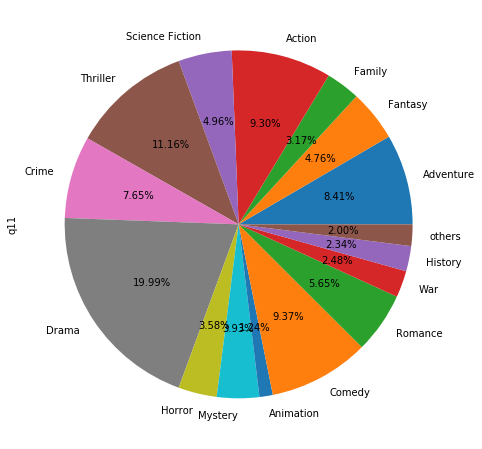

In [46]:
count_genres = defaultdict(int)
for grs in df10['genres']:
    origin_list = ast.literal_eval(grs)  # "[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}]" --> []
    name_list = [item['name'] for item in origin_list]  # get all names for every row
    for name in name_list:
        count_genres[name] += 1
sort_list = sorted(count_genres.items(), key = lambda x:x[1])
# print(count_genres,"\n")
# print(sort_list)
merge = [  sort_list[i][0]  for i in range(4)]
# print(merge)

count_genres['others'] = sum( [ count_genres[name] for name in merge  ] )
for name in merge:
    del count_genres[name]

keys = list(count_genres.keys())
values = list(count_genres.values())
# total_value = sum(values)
# percentages = [100 * float(v / total_value) for v in values]
res_df = pd.Series(values, index=keys, name="q11")
res_df.plot.pie(autopct='%.2f%%',figsize=(8, 8))


In [47]:
# count_genres = defaultdict(int)
# for grs in df10['genres']:
#     origin_list = ast.literal_eval(grs)  # "[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}]" --> []
#     name_list = [item['name'] for item in origin_list]  # get all names for every row
#     for name in name_list:
#         count_genres[name] += 1
# keys = list(count_genres.keys())
# values = list(count_genres.values())
# total_value = sum(values)
# percentages = [100 * float(v / total_value) for v in values]
# res_df = pd.Series(values, index=keys, name="q11")
# res_df.plot.pie(autopct='%.2f%%',figsize=(9, 9))

In [48]:
import matplotlib.pyplot as plt
list(df10['production_countries'])[0]

"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

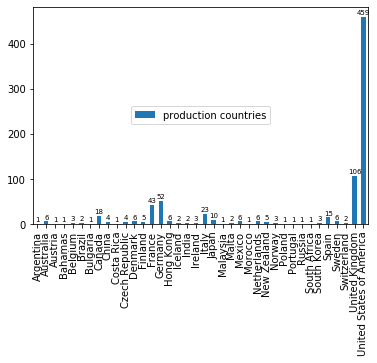

In [49]:
count_countries = defaultdict(int)
for record in df10['production_countries']:
    origin_list = ast.literal_eval(record)
    for dct in origin_list:
        count_countries[dct['name']] += 1

# for key,value in count_countries.items():
#     print(key, value)
res_list = sorted(count_countries.items(), key=lambda x:x[0])
keys = [  t[0]  for t in res_list  ]
values = [  t[1]  for t in res_list  ]
# print()
# for item in res_list:
#     print(item[0], ": ", item[1])

res_df = pd.Series(values,index=keys, name='q12')
# for x, y in zip(keys,values):
#     plt.text(x,y + 5,'%.0f'%y,ha = 'center',va = 'bottom',fontsize=7)
# plt.bar(keys, values, label="production countries")
res_df.plot.bar(keys, values, label="production countries")
for x,y in enumerate(values):
    plt.text(x,y+3,'%s' %y,ha='center',va='bottom', fontsize=7)
plt.legend(loc='center')
# plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=5.0)


In [50]:
df10

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,crew,success_impact
id,,,,,,,,,,,,,,,,
767,250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,13,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2009-07-07,933959197,153,"[{'iso_639_1': 'en', 'name': 'English'}]",Harry Potter and the Half-Blood Prince,7.4,5435,"Albus Dumbledore,Alecto Carrow,Amycus Carrow,A...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...",2.735837
534,200000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",en,11,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2009-05-20,371353001,115,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Terminator Salvation,5.9,2496,"Barnes,Blair Williams,General Ashdown,John Con...","[{'credit_id': '52fe424ec3a36847f8013ffd', 'de...",0.856765
1266,20000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,8,"[{'name': 'Fox Searchlight Pictures', 'id': 43...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-10-04,65569869,109,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Street Kings,6.3,369,"Assistant D.A.,Black Woman,Boss Kim,Captain Ja...","[{'credit_id': '52fe42ecc3a36847f802cfa3', 'de...",2.278493
440,40000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",en,7,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-12-25,41797066,94,"[{'iso_639_1': 'en', 'name': 'English'}]",Aliens vs Predator: Requiem,4.9,758,"Alien,Buddy,Carrie,Col. Stevens,Curtis,Dale,Da...","[{'credit_id': '53957f680e0a266db40063f9', 'de...",0.044927
1534,45000000,"[{'id': 12, 'name': 'Adventure'}]",en,7,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-11-01,30822861,99,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pathfinder,5.4,173,"Blackwing,Elder #1,Elder #2,Elder #3,Flashback...","[{'credit_id': '52fe42fbc3a36847f8031699', 'de...",-0.315048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,923000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",en,3,"[{'name': 'Charles Chaplin Productions', 'id':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1925-06-25,2500000,95,"[{'iso_639_1': 'en', 'name': 'English'}]",The Gold Rush,7.7,308,"Barman (uncredited),Big Jim McKay,Black Larsen...","[{'credit_id': '52fe4294c3a36847f8029977', 'de...",1.708559
1405,546883,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,4,"[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8...","[{'iso_3166_1': 'US', 'name': 'United States o...",1924-04-12,0,140,"[{'iso_639_1': 'en', 'name': 'English'}]",Greed,7.5,25,"August Sieppe (uncredited),Balloon Vendor (unc...","[{'credit_id': '52fe42f3c3a36847f802f33d', 'de...",-1.000000
669,53000,"[{'id': 99, 'name': 'Documentary'}]",en,1,"[{'name': 'Révillon Frères', 'id': 397}]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1922-11-06,0,79,"[{'iso_639_1': 'en', 'name': 'English'}]",Nanook of the North,7.2,50,"Nanook,Nanook's son,Nanook's son,Nanook's wife...","[{'credit_id': '52fe4267c3a36847f801bcd5', 'de...",-1.000000


In [86]:
import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color
# df10.plot.scatter(x='vote_average', y='success_impact', title='vote_average vs success_impact')
colors = list(set(list(df10['original_language'])))
colors_set = [  randomcolor()   for i in range(len(colors))]
colors

['no',
 'fr',
 'ko',
 'en',
 'pt',
 'it',
 'fi',
 'sv',
 'ja',
 'es',
 'zh',
 'nl',
 'de',
 'da',
 'af']

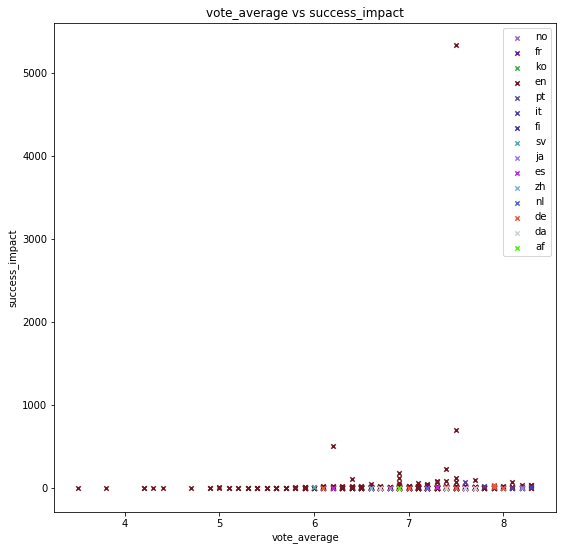

In [89]:
# for i in range(len(colors)):
#     ax = df10.plot.scatter(x='vote_average', y='success_impact', label=colors[i], c=color_set[i], ax=ax)
df_list = []
for i in range(len(colors)):
    qry = 'original_language == ' + '"' + colors[i] + '"' + ''
    df_list.append(df10.query(qry))

ax = df_list[0].plot.scatter(x='vote_average', y='success_impact', label=colors[0], \
                             c=color_set[0], marker="x", figsize=(9,9), title='vote_average vs success_impact')
for i in range(1,len(colors)):
    df_list[i].plot.scatter(x='vote_average', y='success_impact', label=colors[i], c=color_set[i], marker="x", ax=ax)
